In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import numpy as np 
import pandas as pd
from keras.applications import resnet


In [ ]:

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
flowers_path = "/content/drive/MyDrive/datasets/train/flowers"
classes = os.listdir(flowers_path)
classes

['dandelion', 'tulip', 'daisy', 'rose', 'sunflower']

In [ ]:
image_size = (224, 224)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    flowers_path,
    validation_split=0.2,          
    subset="training",             
    seed=1337,                     
    image_size=image_size,         
    batch_size=batch_size,         
    label_mode="categorical",      
    class_names=classes
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    flowers_path,
    validation_split=0.2,
    subset="validation",          
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical",
    class_names=classes
)


Found 4337 files belonging to 5 classes.
Using 3470 files for training.
Found 4337 files belonging to 5 classes.
Using 867 files for validation.


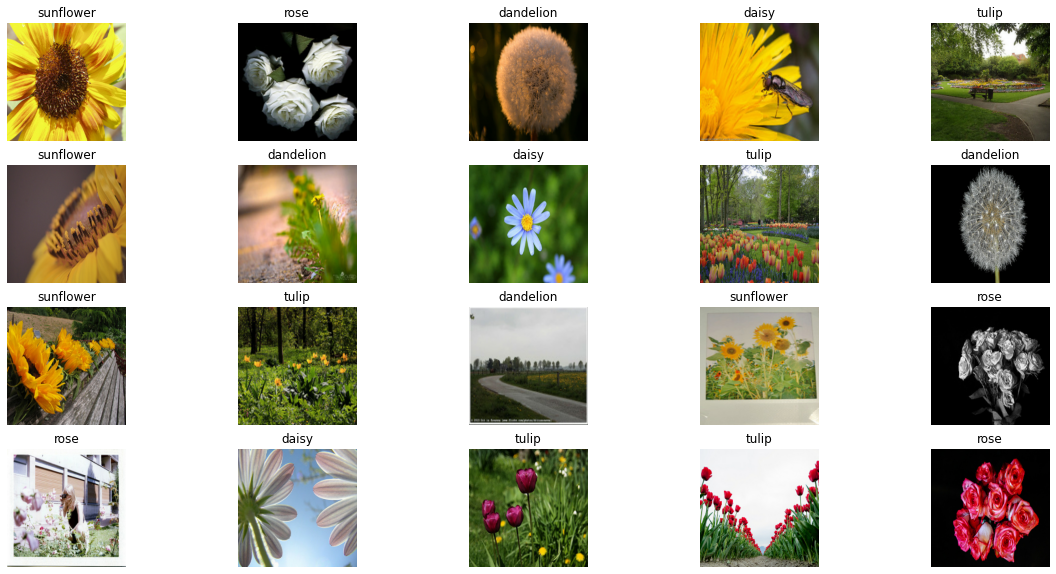

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
for images, labels in train_ds.take(1):      
    for i in range(20):
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[np.argmax(labels[i])])  
        plt.axis("off")
plt.show()

In [ ]:
input_shape = [224, 224]


model = tf.keras.applications.ResNet50(
    input_shape=input_shape+[3],weights='imagenet',include_top=False
)

model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model

x=Flatten()(model.output)
predictions=Dense(5,activation='softmax')(x)

model1=Model(inputs=model.input,outputs=predictions)

In [ ]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model1.fit(train_ds, epochs=2, verbose=1, validation_data=val_ds)

Epoch 1/2
109/109 [==============================] - 2513s 23s/step - loss: 3.8553 - accuracy: 0.5375 - val_loss: 1073248.2500 - val_accuracy: 0.2215
Epoch 2/2
109/109 [==============================] - 2530s 23s/step - loss: 2.0807 - accuracy: 0.6239 - val_loss: 931.6263 - val_accuracy: 0.2584


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model('model_resnet')

In [ ]:
img=image.load_img('/content/drive/MyDrive/datasets/train/flowers/dandelion/test1.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
result=model.predict(x)


In [ ]:
result

array([[0., 0., 0., 0., 1.]], dtype=float32)